**Applied Machine Learning - Homework 2 (Question 1)**

**Group Members:**

1. Yash Takte
2. Sejal Nimkar
3. Neha Kothavade

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the rock categories (labels) from the second column of 'aggregateRockData.xlsx'
rock_categories = pd.read_excel(r'D:\MS\Indiana University Bloomington\Classes\Applied Machine Learning (Zoran Tiganj - CSCI-P 556)\Homework\Homework 2 Q1\aggregateRockData.xlsx', 
                                usecols=[1], nrows=480, header=None)  # Using only column 2 for rock category
rock_categories.columns = ['Category']  

In [14]:
# Load the rock features from 'feature_presence540.txt' 
features = pd.read_csv(r'D:\MS\Indiana University Bloomington\Classes\Applied Machine Learning (Zoran Tiganj - CSCI-P 556)\Homework\Homework 2 Q1\feature_presence540.txt', 
                       sep=r'\s+', header=None) 
features = features.iloc[:480, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]  # Using columns 3 to 14 (Token, Features)

In [15]:
features.columns = ['Token', 'Angular_fragments', 'Rounded_fragments', 'Straight_stripes', 'Curved_stripes', 
                    'Physical_layers', 'Veins', 'Oily_shimmery_texture', 'Splotchy_texture', 
                    'Single_translucent_crystal', 'Multiple_cubic_crystals', 'Sandy_texture']

In [16]:
# Combine features and categories into a single DataFrame
df = pd.concat([rock_categories, features], axis=1)

# **Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [18]:
# Checking for missing values
print(df.isnull().sum())

Category                      0
Token                         0
Angular_fragments             0
Rounded_fragments             0
Straight_stripes              0
Curved_stripes                0
Physical_layers               0
Veins                         0
Oily_shimmery_texture         0
Splotchy_texture              0
Single_translucent_crystal    0
Multiple_cubic_crystals       0
Sandy_texture                 0
dtype: int64


In [19]:
df.head()

,Category,Token,Angular_fragments,Rounded_fragments,Straight_stripes,Curved_stripes,Physical_layers,Veins,Oily_shimmery_texture,Splotchy_texture,Single_translucent_crystal,Multiple_cubic_crystals,Sandy_texture
0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category                    480 non-null    int64  
 1   Token                       480 non-null    object 
 2   Angular_fragments           480 non-null    object 
 3   Rounded_fragments           480 non-null    object 
 4   Straight_stripes            480 non-null    object 
 5   Curved_stripes              480 non-null    float64
 6   Physical_layers             480 non-null    float64
 7   Veins                       480 non-null    float64
 8   Oily_shimmery_texture       480 non-null    float64
 9   Splotchy_texture            480 non-null    float64
 10  Single_translucent_crystal  480 non-null    float64
 11  Multiple_cubic_crystals     480 non-null    float64
 12  Sandy_texture               480 non-null    float64
dtypes: float64(8), int64(1), object(4)


In [21]:
# Convert numeric columns from object to numeric type
for column in ['Token', 'Angular_fragments', 'Rounded_fragments', 'Straight_stripes']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [22]:
# Verify the range of token numbers
print(df['Token'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category                    480 non-null    int64  
 1   Token                       480 non-null    int64  
 2   Angular_fragments           480 non-null    float64
 3   Rounded_fragments           480 non-null    float64
 4   Straight_stripes            480 non-null    float64
 5   Curved_stripes              480 non-null    float64
 6   Physical_layers             480 non-null    float64
 7   Veins                       480 non-null    float64
 8   Oily_shimmery_texture       480 non-null    float64
 9   Splotchy_texture            480 non-null    float64
 10  Single_translucent_crystal  480 non-null    float64
 11  Multiple_cubic_crystals     480 non-null    float64
 12  Sandy_texture               480 non-null    float64
dtypes: float64(11), int64(2)
memory usa

**Question 1 ->**

In [25]:
# Display statistical values for each attribute
print("Statistical values for each attribute:")
print(df.describe())

Statistical values for each attribute:
         Category       Token  Angular_fragments  Rounded_fragments  \
count  480.000000  480.000000         480.000000         480.000000   
mean     2.000000    8.500000           0.084479           0.080208   
std      0.817348    4.614582           0.193996           0.197648   
min      1.000000    1.000000           0.000000           0.000000   
25%      1.000000    4.750000           0.000000           0.000000   
50%      2.000000    8.500000           0.000000           0.000000   
75%      3.000000   12.250000           0.050000           0.050000   
max      3.000000   16.000000           1.000000           1.000000   

       Straight_stripes  Curved_stripes  Physical_layers       Veins  \
count        480.000000      480.000000       480.000000  480.000000   
mean           0.067729        0.042292         0.165146    0.052396   
std            0.194792        0.160970         0.216635    0.102676   
min            0.000000        0.

**The descriptive statistics for each attribute are shown in the table above.**

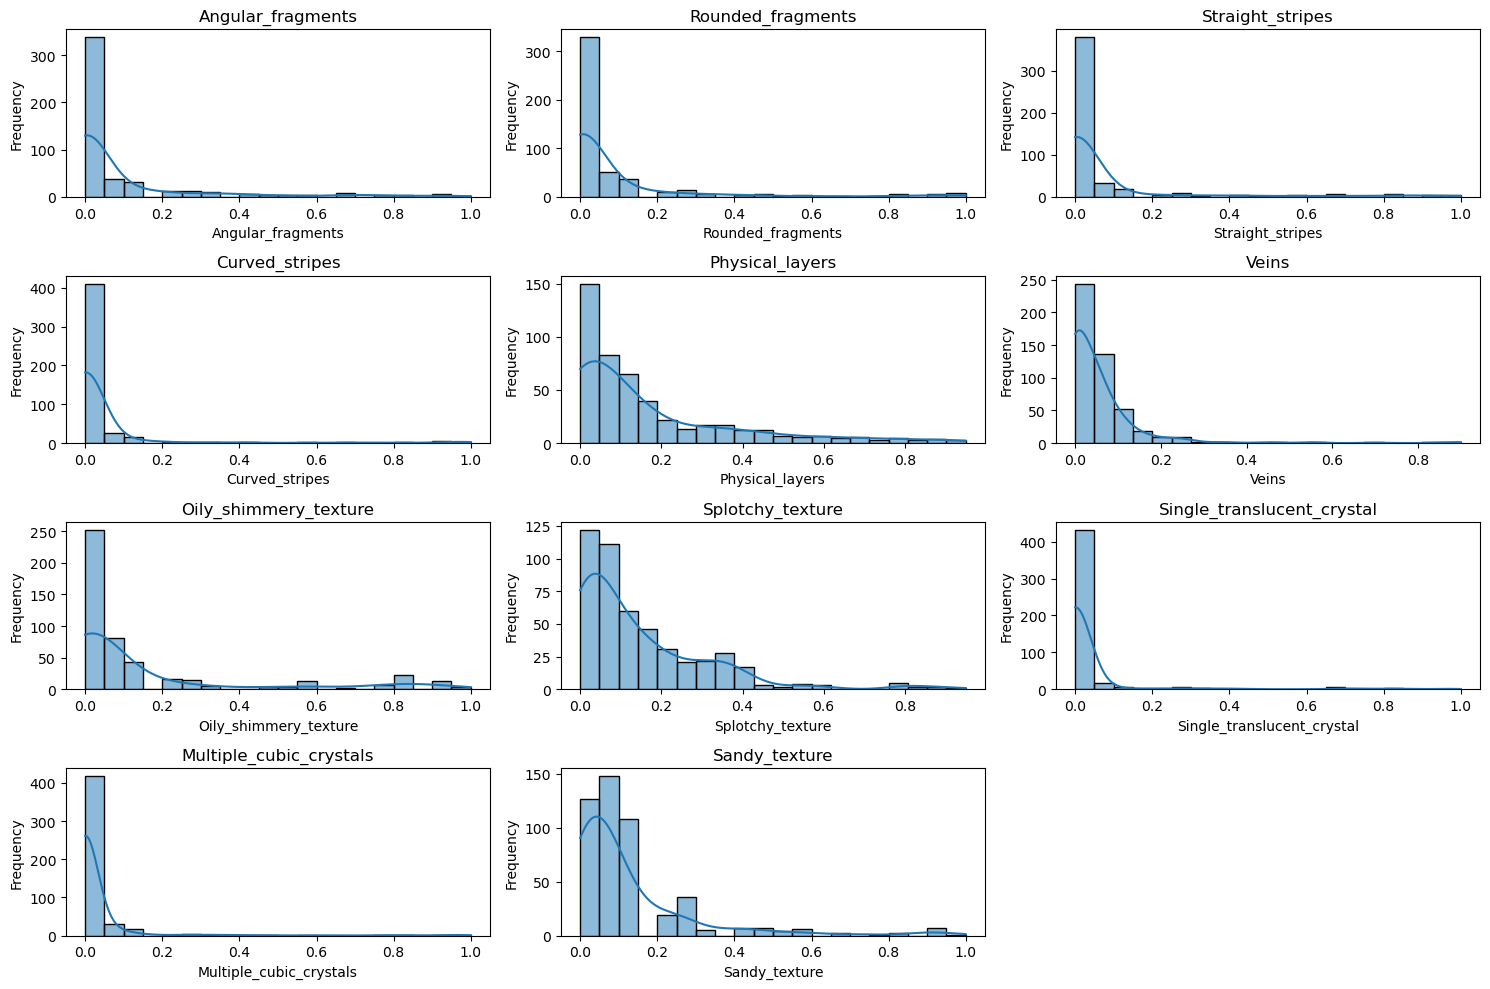

In [27]:
# Visualizations (histograms) of the distributions for each attribute (excluding Category and Token)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[2:], 1): 
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Above are the Visualizations (histograms) of the distributions for each attribute (excluding Category and Token)**

In [29]:
# Check for attributes that might require special treatment (excluding Category and Token)
skewness = df.iloc[:, 2:].apply(lambda x: x.skew())  
print("\nSkewness of attributes (excluding Token and Category):")
print(skewness)

# Attributes with high skewness might require transformation
special_treatment_attributes = skewness[abs(skewness) > 1].index.tolist()
print("\nAttributes that might require special treatment due to high skewness:")
print(special_treatment_attributes)


Skewness of attributes (excluding Token and Category):
Angular_fragments             2.836212
Rounded_fragments             3.303173
Straight_stripes              3.363206
Curved_stripes                4.710487
Physical_layers               1.716590
Veins                         4.885632
Oily_shimmery_texture         1.999686
Splotchy_texture              1.989284
Single_translucent_crystal    5.154233
Multiple_cubic_crystals       6.510238
Sandy_texture                 2.775302
dtype: float64

Attributes that might require special treatment due to high skewness:
['Angular_fragments', 'Rounded_fragments', 'Straight_stripes', 'Curved_stripes', 'Physical_layers', 'Veins', 'Oily_shimmery_texture', 'Splotchy_texture', 'Single_translucent_crystal', 'Multiple_cubic_crystals', 'Sandy_texture']


**Are there any attributes that might require special treatment? If so, what special treatment might they require?**

Several attributes exhibit high skewness, including Angular_fragments, Rounded_fragments, Straight_stripes, Curved_stripes, Physical_layers, Veins, Oily_shimmery_texture, Splotchy_texture, Single_translucent_crystal, Multiple_cubic_crystals, and Sandy_texture. These attributes may require special treatment, such as log or square root transformations, to reduce skewness and bring their distributions closer to normal. This can improve model performance by stabilizing variance and minimizing the influence of outliers.

In [31]:
# Apply square root transformation to attributes with high skewness
for column in special_treatment_attributes:
    df[column] = np.sqrt(df[column])  # Apply square root transformation

skewness_after_square_root = df[special_treatment_attributes].apply(lambda x: x.skew())
print("\nSkewness of attributes after square root transformation:")
print(skewness_after_square_root)


Skewness of attributes after square root transformation:
Angular_fragments             1.738205
Rounded_fragments             1.908674
Straight_stripes              2.403034
Curved_stripes                3.353447
Physical_layers               0.537003
Veins                         1.238189
Oily_shimmery_texture         1.232624
Splotchy_texture              0.359597
Single_translucent_crystal    3.871896
Multiple_cubic_crystals       3.904109
Sandy_texture                 0.824195
dtype: float64


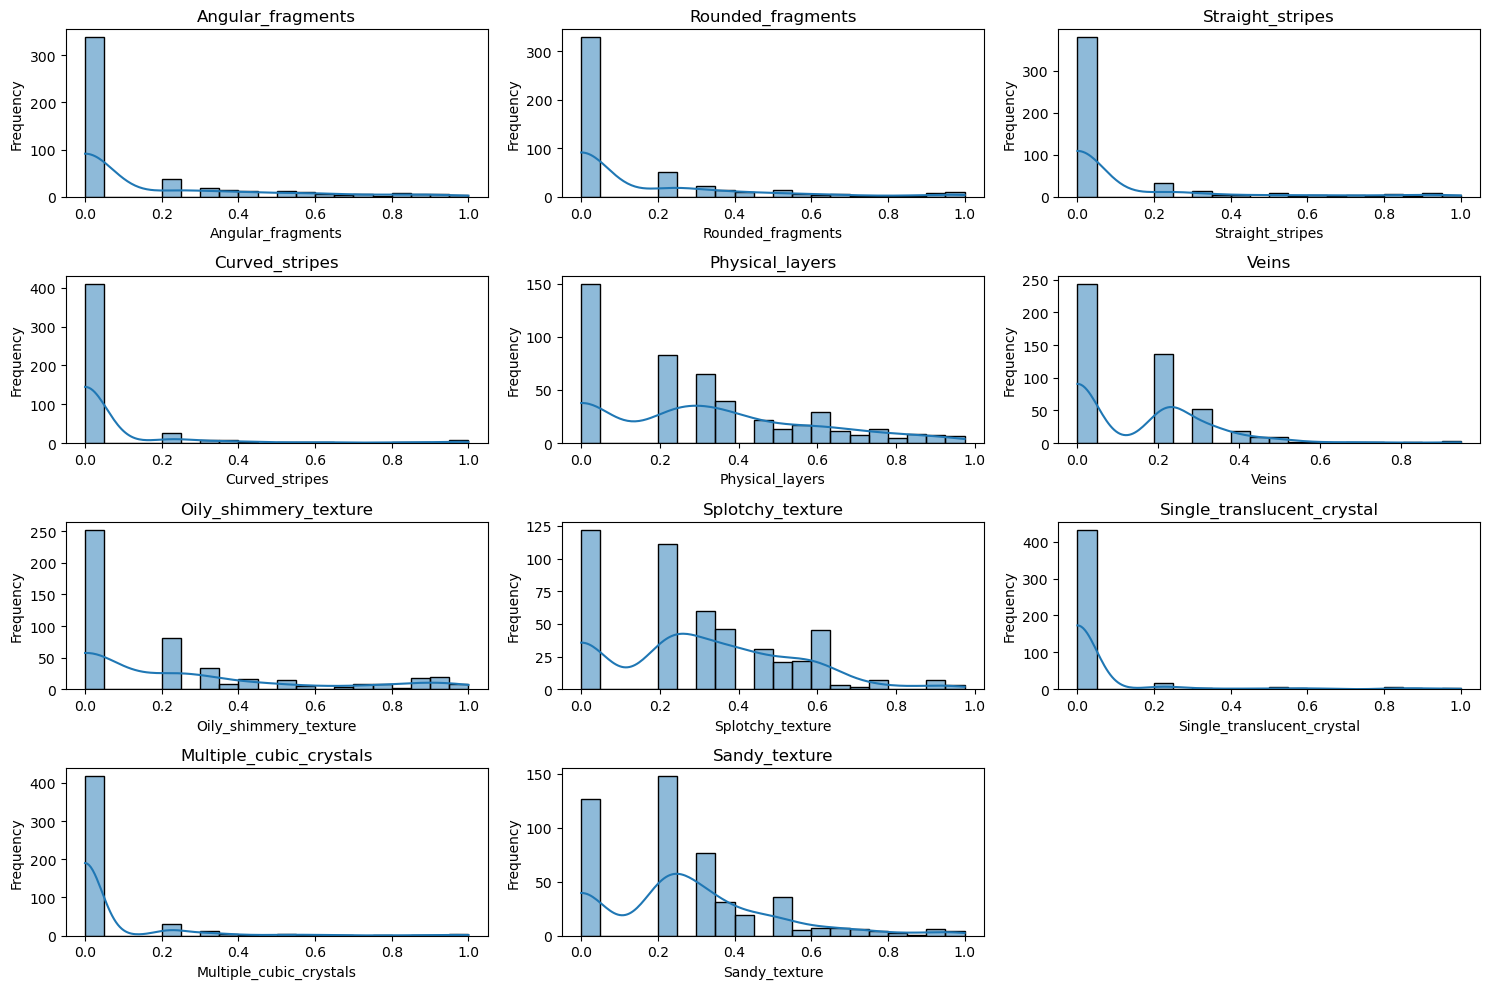

In [32]:
# Visualizations (histograms) of the distributions for each attribute (after transformation)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[2:], 1):  
    plt.subplot(4, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [33]:
# Outlier Detection using Z-scores after transformation
z_scores = np.abs(stats.zscore(df.iloc[:, 2:]))  
threshold = 3  
outliers_after_transformation = (z_scores > threshold).any(axis=1)  

outlier_data = df[outliers_after_transformation]

# Print outliers
print("Outliers detected based on Z-scores:")
print(outlier_data)

Outliers detected based on Z-scores:
     Category  Token  Angular_fragments  Rounded_fragments  Straight_stripes  \
3           1      4           0.316228           0.921954          0.000000   
4           1      5           0.591608           0.894427          0.000000   
15          1     16           0.447214           0.948683          0.000000   
85          1      6           0.000000           0.000000          0.223607   
86          1      7           0.000000           0.000000          0.632456   
..        ...    ...                ...                ...               ...   
460         3     13           0.000000           0.000000          0.774597   
461         3     14           0.000000           0.000000          0.000000   
462         3     15           0.000000           0.000000          0.000000   
463         3     16           0.000000           0.000000          0.000000   
469         3      6           0.000000           0.000000          0.894427   

  

In [34]:
# Remove outliers from the DataFrame
df_cleaned = df[~outliers_after_transformation].reset_index(drop=True)
print(f"\nNumber of outliers removed after transformation: {df.shape[0] - df_cleaned.shape[0]}")


Number of outliers removed after transformation: 107


# **Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

**Question 2 ->**

In [37]:
# Correlation Analysis with Category for cleaned data
correlation_matrix = df_cleaned.corr()  # Correlation matrix for the cleaned data
print("\nPearson Correlation Coefficients with Category:")
print(correlation_matrix['Category'])


Pearson Correlation Coefficients with Category:
Category                      1.000000
Token                        -0.017809
Angular_fragments            -0.292925
Rounded_fragments            -0.270388
Straight_stripes              0.138070
Curved_stripes                0.103989
Physical_layers               0.486930
Veins                         0.343348
Oily_shimmery_texture         0.114568
Splotchy_texture             -0.188461
Single_translucent_crystal    0.179104
Multiple_cubic_crystals      -0.225192
Sandy_texture                 0.055746
Name: Category, dtype: float64


**The analysis of correlations between data attributes and the target category reveals that Physical_layers and Veins show a strong positive relationship with the category, indicating their potential importance in predictions. Attributes like Angular_fragments and Rounded_fragments have a negative relationship, suggesting that higher values may relate to different categories. Weak relationships appear in attributes like Straight_stripes and Oily_shimmery_texture, while Token has nearly no link. These insights highlight which features could be most valuable for categorization, with stronger correlations likely contributing more to model accuracy.**

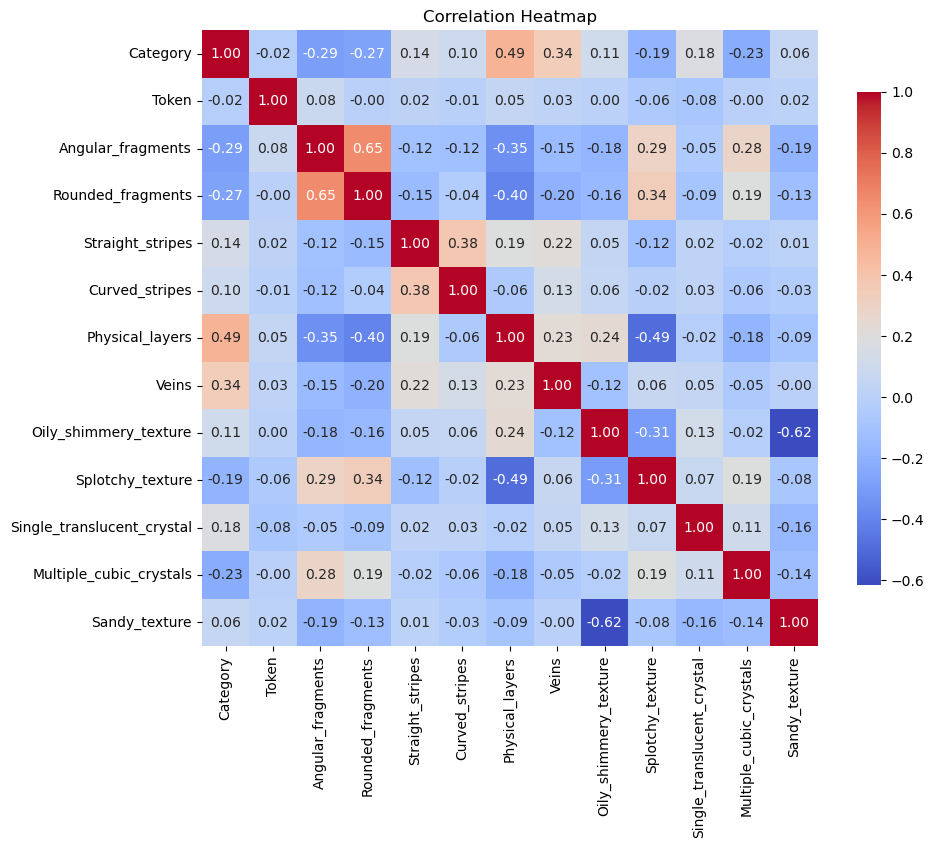

In [39]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

**Above is the computed correlation matrix & heatmap of correlation matrix.**

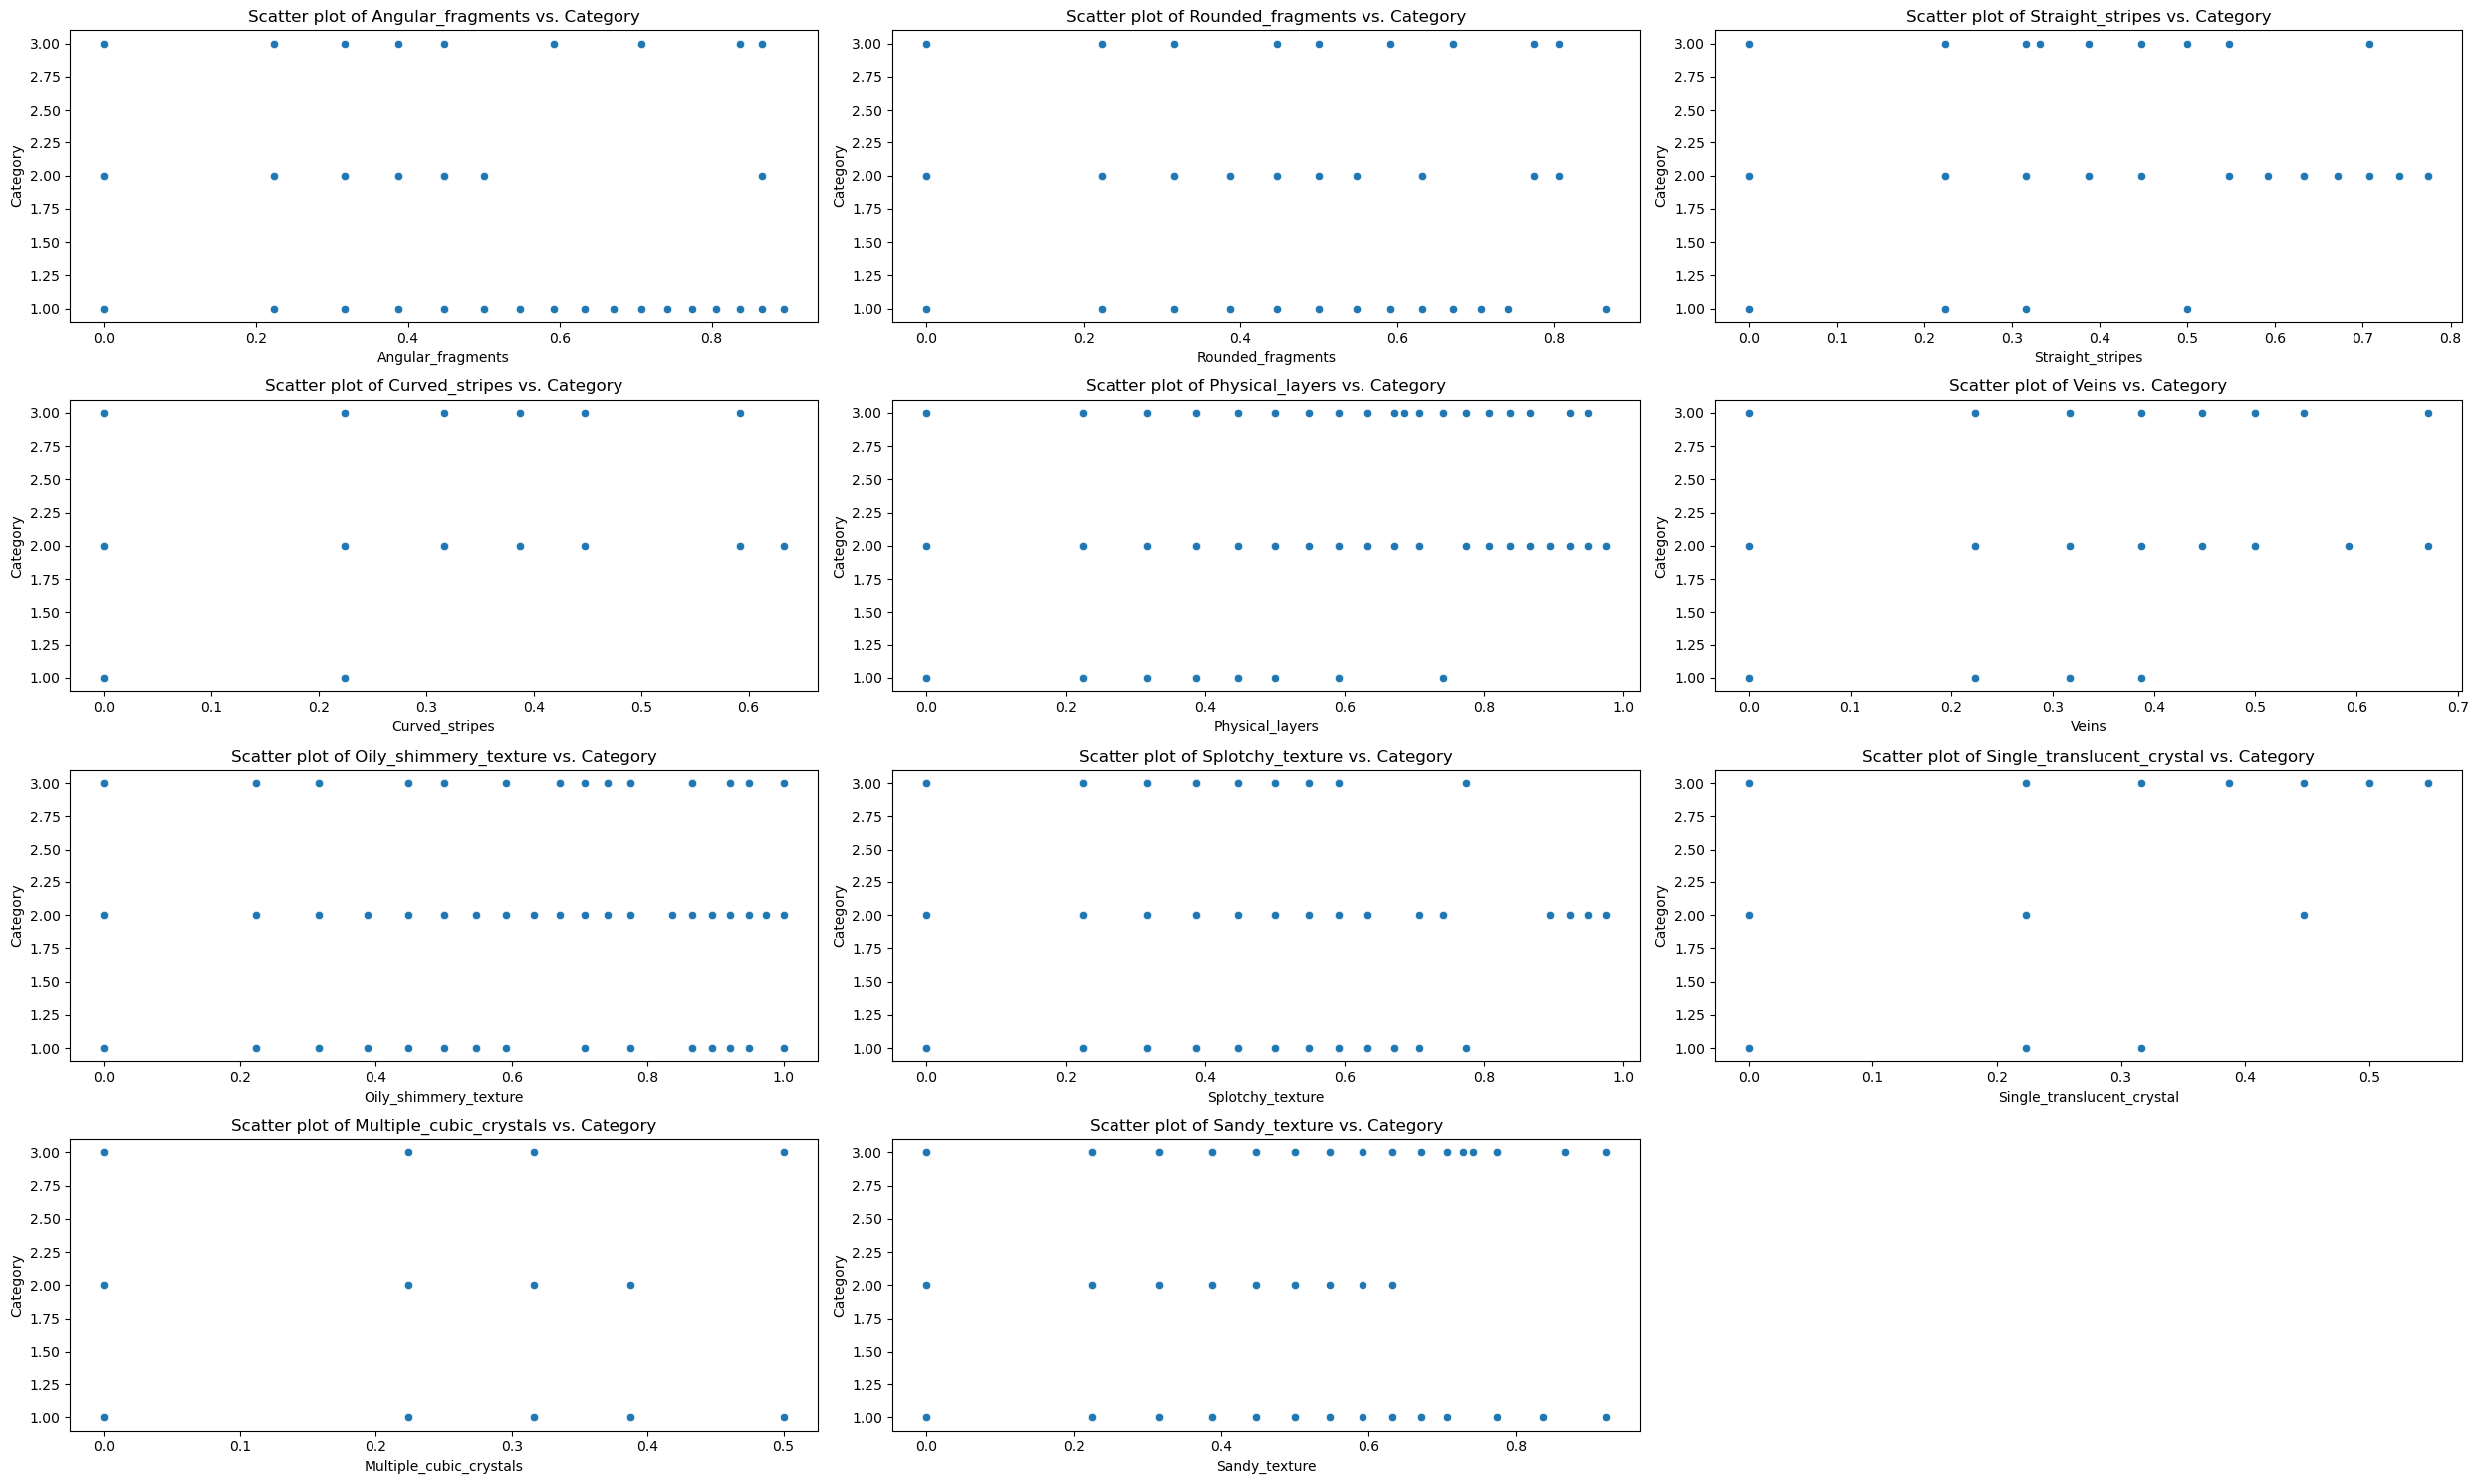

In [41]:
# Generate scatter plots for features against Category
plt.figure(figsize=(25, 15))
for i, column in enumerate(df_cleaned.columns[2:], 1):  # Skip the first two columns (Category and Token)
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df_cleaned, x=column, y='Category')
    plt.title(f'Scatter plot of {column} vs. Category')
    plt.xlabel(column)
    plt.ylabel('Category')

plt.tight_layout()
plt.show()

**Above are the scatter plots.**

# **For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).**

**Question 3 ->**

In [45]:
# Split the data based on token numbers for training, validation, and testing sets
train_data = df_cleaned[df_cleaned['Token'].isin(range(1, 11))]  # Token numbers 1-10 for training
validation_data = df_cleaned[df_cleaned['Token'].isin(range(11, 14))]  # Token numbers 11-13 for validation
test_data = df_cleaned[df_cleaned['Token'].isin(range(14, 17))]  # Token numbers 14-16 for testing

In [46]:
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(validation_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 232
Validation set size: 72
Testing set size: 69


In [47]:
# Feature columns (exclude 'Category' and 'Token')
feature_columns = ['Angular_fragments', 'Rounded_fragments', 'Straight_stripes', 'Curved_stripes', 
                   'Physical_layers', 'Veins', 'Oily_shimmery_texture', 'Splotchy_texture', 
                   'Single_translucent_crystal', 'Multiple_cubic_crystals', 'Sandy_texture']

In [48]:
X_train = train_data[feature_columns]
y_train = train_data['Category']
X_val = validation_data[feature_columns]
y_val = validation_data['Category']
X_test = test_data[feature_columns]
y_test = test_data['Category']

In [49]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# **Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**

In [51]:
# Evaluation functions

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

def report_performance(model_name, y_train_pred, y_val_pred, y_test_pred):
    print(f"\n{model_name}")
    
    print("Training Performance:")
    train_metrics = evaluate_model(y_train, y_train_pred)
    print(f"Accuracy: {train_metrics[0]:.4f}, Precision: {train_metrics[1]:.4f}, Recall: {train_metrics[2]:.4f}, F1-score: {train_metrics[3]:.4f}")
    
    print("\nValidation Performance:")
    val_metrics = evaluate_model(y_val, y_val_pred)
    print(f"Accuracy: {val_metrics[0]:.4f}, Precision: {val_metrics[1]:.4f}, Recall: {val_metrics[2]:.4f}, F1-score: {val_metrics[3]:.4f}")
    
    print("\nTesting Performance:")
    test_metrics = evaluate_model(y_test, y_test_pred)
    print(f"Accuracy: {test_metrics[0]:.4f}, Precision: {test_metrics[1]:.4f}, Recall: {test_metrics[2]:.4f}, F1-score: {test_metrics[3]:.4f}")
    
    return val_metrics[0], val_metrics[3]  

**Question 4 (a) ->**

In [53]:
# Multinomial Logistic Regression (Softmax)

logreg_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga'], 'max_iter': [100, 200, 500]}
logreg = LogisticRegression(multi_class='multinomial')

# Grid search for hyperparameter tuning
logreg_grid = GridSearchCV(logreg, logreg_params, cv=3, scoring='accuracy', return_train_score=True)
logreg_grid.fit(X_train_scaled, y_train)

# Print all hyperparameter combinations and their respective scores
print("\nAll Hyperparameter Combinations and their Performance:")
for i in range(len(logreg_grid.cv_results_['params'])):
    params = logreg_grid.cv_results_['params'][i]
    mean_train_score = logreg_grid.cv_results_['mean_train_score'][i]
    mean_val_score = logreg_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Best Logistic Regression model
best_logreg = logreg_grid.best_estimator_

# Predictions for training, validation, and test sets
y_train_pred_logreg = best_logreg.predict(X_train_scaled)
y_val_pred_logreg = best_logreg.predict(X_val_scaled)
y_test_pred_logreg = best_logreg.predict(X_test_scaled)

best_logreg_val_acc, best_logreg_val_f1 = report_performance("Logistic Regression", y_train_pred_logreg, y_val_pred_logreg, y_test_pred_logreg)

# Print the best hyperparameters and their respective performance
print(f"\nBest Logistic Regression Hyperparameters: {logreg_grid.best_params_}")
print(f"Training Accuracy: {logreg_grid.best_score_:.4f}, Validation Accuracy: {best_logreg_val_acc:.4f}")


All Hyperparameter Combinations and their Performance:
Params: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.01, 'max_iter': 200, 'solver': 'lbfgs'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.01, 'max_iter': 200, 'solver': 'saga'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.01, 'max_iter': 500, 'solver': 'lbfgs'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.01, 'max_iter': 500, 'solver': 'saga'}, Training Accuracy: 0.6640, Validation Accuracy: 0.5992
Params: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}, Training Accuracy: 0.7070, Validation Accuracy: 0.5994
Params: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}, Training Accuracy: 0.7070, Validation Accuracy: 0.5994
Params: {'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}

**Discussion on the impact of different hyper parameters ->**

Adjusting the hyperparameters in logistic regression had a noticeable impact on performance. Lower C values, especially around 0.1, provided stable validation accuracy, reaching the highest of 0.7778. When C was increased to 10, training accuracy improved a bit, but validation accuracy either leveled off or declined, suggesting some overfitting. The choice between lbfgs and saga solvers didn’t change results much. Overall, using C=0.1 and default iterations gave the best validation performance, balancing between accuracy and avoiding overfitting.

**Question 4 (b) ->**

In [56]:
# Support Vector Machine (SVM)

svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'degree': [2, 3], 'gamma': ['scale', 'auto']}
svm = SVC()

# Grid search for hyperparameter tuning
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy', return_train_score=True)
svm_grid.fit(X_train_scaled, y_train)

# Print all hyperparameter combinations and their respective scores
print("\nAll Hyperparameter Combinations and their Performance:")
for i in range(len(svm_grid.cv_results_['params'])):
    params = svm_grid.cv_results_['params'][i]
    mean_train_score = svm_grid.cv_results_['mean_train_score'][i]
    mean_val_score = svm_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Best SVM model
best_svm = svm_grid.best_estimator_

# Predictions for training, validation, and test sets
y_train_pred_svm = best_svm.predict(X_train_scaled)
y_val_pred_svm = best_svm.predict(X_val_scaled)
y_test_pred_svm = best_svm.predict(X_test_scaled)

best_svm_val_acc, best_svm_val_f1 = report_performance("SVM", y_train_pred_svm, y_val_pred_svm, y_test_pred_svm)

# Print the best hyperparameters and their respective performance
print(f"\nBest SVM Hyperparameters: {svm_grid.best_params_}")
print(f"Best Validation Accuracy: {best_svm_val_acc:.4f}, Best Validation F1-score: {best_svm_val_f1:.4f}")


All Hyperparameter Combinations and their Performance:
Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}, Training Accuracy: 0.7135, Validation Accuracy: 0.5692
Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}, Training Accuracy: 0.5108, Validation Accuracy: 0.4353
Params: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}, Training Accuracy: 0.5948, Validation Accuracy: 0.5130
Params: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}, Training Accuracy: 0.7135, Validation Accuracy: 0.5692
Params: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}, Training Accuracy: 0.5065, Validation Accuracy: 0.4353
Params: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}, Training Accuracy: 0.5905, Validation Accuracy: 0.5087
Params: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}, Training Accuracy: 0.7135, Validation Accuracy: 0.5692
Params: {'C': 0.1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}, Traini

**Discussion on the impact of different hyper parameters ->**

The SVM model showed different performances with changes to C, degree, gamma, and kernel. The best validation accuracy (0.7500) was achieved using C=1, degree=2, gamma=scale, and the linear kernel. Lower C values gave moderate validation accuracy around 0.57, while higher C values improved training accuracy but led to overfitting, reducing validation accuracy. The linear kernel consistently performed better than poly and rbf, which had lower validation accuracy, suggesting it’s a better choice for this data. The final chosen settings provided good balance with a high validation accuracy (0.7500) and an F1-score of 0.7398.

**Question 4 (c) ->**


All Hyperparameter Combinations and their Performance:
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Training Accuracy: 0.9957, Validation Accuracy: 0.5474
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, Training Accuracy: 0.9978, Validation Accuracy: 0.5259
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, Training Accuracy: 0.9978, Validation Accuracy: 0.5431
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}, Training Accuracy: 0.9483, Validation Accuracy: 0.5733
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Training Accuracy: 0.9461, Validation Accuracy: 0.5560
Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Training Accuracy: 0.9569, Validation Accuracy: 0.5647
Params: {'max_depth': 10, 'min_samples_leaf': 

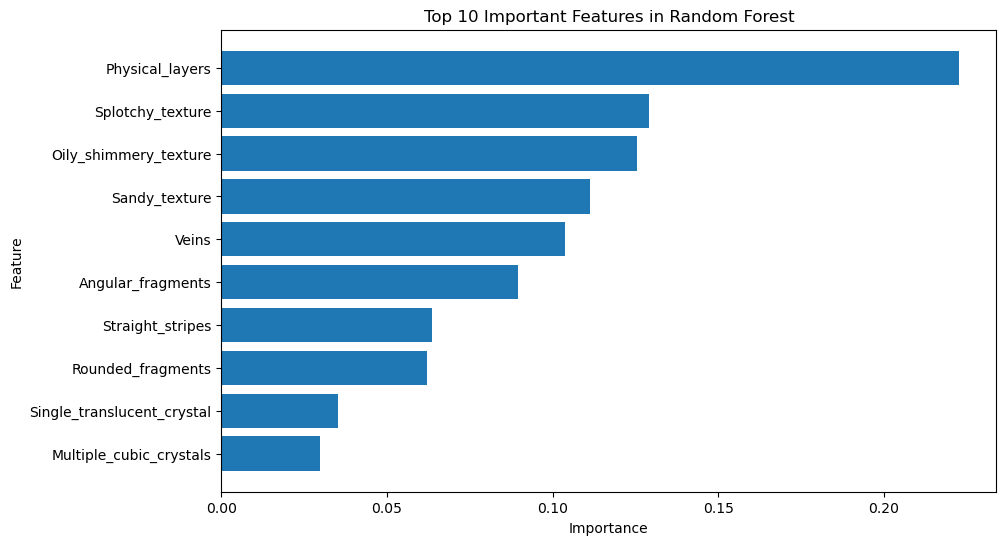

In [59]:
# Random Forest Classifier

rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
rf = RandomForestClassifier(random_state=42)  # Added random_state for reproducibility

# Grid search for hyperparameter tuning
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', return_train_score=True)
rf_grid.fit(X_train_scaled, y_train)

# Print all hyperparameter combinations and their respective scores
print("\nAll Hyperparameter Combinations and their Performance:")
for i in range(len(rf_grid.cv_results_['params'])):
    params = rf_grid.cv_results_['params'][i]
    mean_train_score = rf_grid.cv_results_['mean_train_score'][i]
    mean_val_score = rf_grid.cv_results_['mean_test_score'][i]
    print(f"Params: {params}, Training Accuracy: {mean_train_score:.4f}, Validation Accuracy: {mean_val_score:.4f}")

# Best Random Forest model
best_rf = rf_grid.best_estimator_

# Predictions for training, validation, and test sets
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_val_pred_rf = best_rf.predict(X_val_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

best_rf_val_acc, best_rf_val_f1 = report_performance("Random Forest", y_train_pred_rf, y_val_pred_rf, y_test_pred_rf)

# Print the best hyperparameters and their respective performance
print(f"\nBest Random Forest Hyperparameters: {rf_grid.best_params_}")
print(f"Best Validation Accuracy: {best_rf_val_acc:.4f}, Best Validation F1-score: {best_rf_val_f1:.4f}")

# Get feature importances from the best random forest model
feature_importances = best_rf.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top important features
print("\nTop important features:")
print(importance_df.head(10))  # Show top 10 most important features

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Random Forest')
plt.gca().invert_yaxis()
plt.show()

**Discussion on the impact of different hyper parameters:**

The Random Forest model was tested with several combinations of max_depth, min_samples_leaf, min_samples_split, and n_estimators. The best validation accuracy (0.7639) was achieved using max_depth=20, min_samples_leaf=2, min_samples_split=5, and n_estimators=200. While deeper trees (with max_depth=None) often led to high training accuracy (overfitting) around 1.0000, their validation performance was lower, indicating that shallower depths (such as max_depth=20) performed more reliably. Increasing min_samples_split and min_samples_leaf helped reduce overfitting and gave more balanced results. The final model showed a validation accuracy of 0.7639 and an F1-score of 0.7552.

**Question 5 ->**

In [62]:
# Ensemble: Voting Classifier (Hard Voting)

voting_clf_hard = VotingClassifier(estimators=[
    ('log_reg', best_logreg), 
    ('svm', best_svm), 
    ('rf', best_rf)], voting='hard')

voting_clf_hard.fit(X_train_scaled, y_train)

y_train_pred_ensemble_hard = voting_clf_hard.predict(X_train_scaled)
y_val_pred_ensemble_hard = voting_clf_hard.predict(X_val_scaled)
y_test_pred_ensemble_hard = voting_clf_hard.predict(X_test_scaled)

# Report hard voting ensemble performance
val_acc_hard, val_f1_hard = report_performance("Ensemble Classifier (Hard Voting)", y_train_pred_ensemble_hard, y_val_pred_ensemble_hard, y_test_pred_ensemble_hard)


Ensemble Classifier (Hard Voting)
Training Performance:
Accuracy: 0.7371, Precision: 0.7324, Recall: 0.7371, F1-score: 0.7337

Validation Performance:
Accuracy: 0.7778, Precision: 0.7823, Recall: 0.7778, F1-score: 0.7681

Testing Performance:
Accuracy: 0.6087, Precision: 0.6002, Recall: 0.6087, F1-score: 0.6031


In [63]:
# Ensemble: Voting Classifier (Soft Voting)

voting_clf_soft = VotingClassifier(estimators=[
    ('log_reg', best_logreg),  
    ('rf', best_rf)], voting='soft')

voting_clf_soft.fit(X_train_scaled, y_train)

y_train_pred_ensemble_soft = voting_clf_soft.predict(X_train_scaled)
y_val_pred_ensemble_soft = voting_clf_soft.predict(X_val_scaled)
y_test_pred_ensemble_soft = voting_clf_soft.predict(X_test_scaled)

# Report soft voting ensemble performance
val_acc_soft, val_f1_soft = report_performance("Ensemble Classifier (Soft Voting)", y_train_pred_ensemble_soft, y_val_pred_ensemble_soft, y_test_pred_ensemble_soft)


Ensemble Classifier (Soft Voting)
Training Performance:
Accuracy: 0.8362, Precision: 0.8355, Recall: 0.8362, F1-score: 0.8342

Validation Performance:
Accuracy: 0.7778, Precision: 0.7702, Recall: 0.7778, F1-score: 0.7692

Testing Performance:
Accuracy: 0.6087, Precision: 0.5968, Recall: 0.6087, F1-score: 0.5989


In [64]:
# Best Model Selection

best_model_name = None
best_val_acc = -1
best_val_f1 = -1

# Compare validation performance for all models
model_performance = {
    "Logistic Regression": (best_logreg_val_acc, best_logreg_val_f1),
    "SVM": (best_svm_val_acc, best_svm_val_f1),
    "Random Forest": (best_rf_val_acc, best_rf_val_f1),
    "Ensemble (Hard Voting)": (val_acc_hard, val_f1_hard),
    "Ensemble (Soft Voting)": (val_acc_soft, val_f1_soft)
}

# Find the best model
for model_name, (val_acc, val_f1) in model_performance.items():
    if (val_acc > best_val_acc) or (val_acc == best_val_acc and val_f1 > best_val_f1):
        best_val_acc = val_acc
        best_val_f1 = val_f1
        best_model_name = model_name

# Output best model based on validation accuracy and F1 score
print(f"\nThe best model is: {best_model_name}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}, Best Validation F1-score: {best_val_f1:.4f}")


The best model is: Ensemble (Soft Voting)
Best Validation Accuracy: 0.7778, Best Validation F1-score: 0.7692



Summary of model performances:
                    Model  Validation Accuracy  Validation F1-score
0     Logistic Regression             0.777778             0.768122
1                     SVM             0.750000             0.739828
2           Random Forest             0.763889             0.755194
3  Ensemble (Hard Voting)             0.777778             0.768122
4  Ensemble (Soft Voting)             0.777778             0.769180


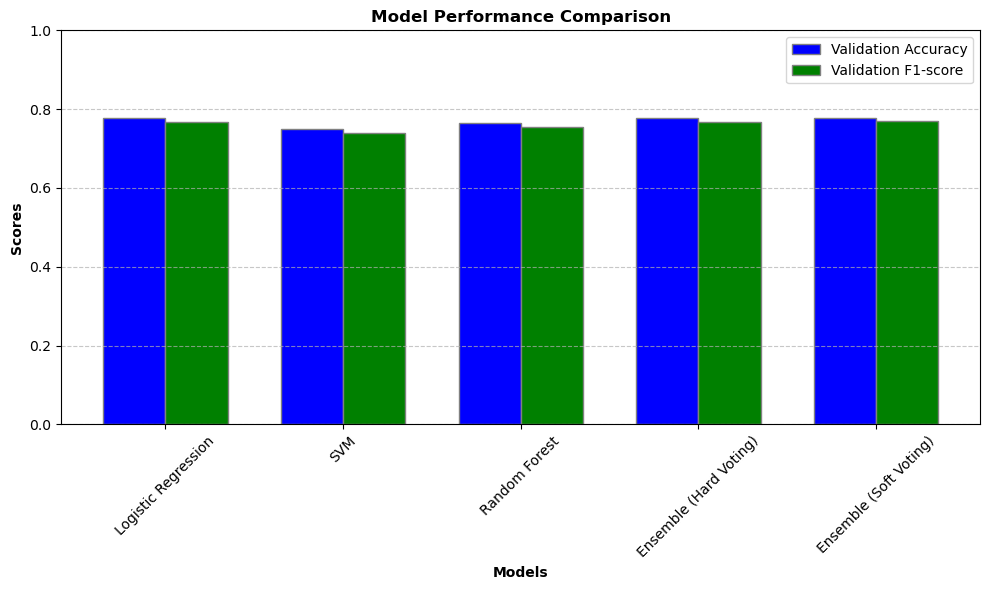

In [65]:
# Summary of model performances
performance_data = {
    "Model": [],
    "Validation Accuracy": [],
    "Validation F1-score": []
}

for model_name, (val_acc, val_f1) in model_performance.items():
    performance_data["Model"].append(model_name)
    performance_data["Validation Accuracy"].append(val_acc)
    performance_data["Validation F1-score"].append(val_f1)

performance_df = pd.DataFrame(performance_data)

print("\nSummary of model performances:")
print(performance_df)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  
bar_width = 0.35
r1 = range(len(performance_df))
r2 = [x + bar_width for x in r1]
ax.bar(r1, performance_df["Validation Accuracy"], color='b', width=bar_width, edgecolor='grey', label='Validation Accuracy')
ax.bar(r2, performance_df["Validation F1-score"], color='g', width=bar_width, edgecolor='grey', label='Validation F1-score')
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_title('Model Performance Comparison', fontweight='bold')
ax.set_xticks([r + bar_width / 2 for r in range(len(performance_df))])
ax.set_xticklabels(performance_df["Model"], rotation=45)
ax.legend()
ax.set_ylim(0, 1) 
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
# Test Set Evaluation of the Best Model

# Select the best model based on the validation performance
best_model = None
if best_model_name == "Logistic Regression":
    best_model = best_logreg
elif best_model_name == "SVM":
    best_model = best_svm
elif best_model_name == "Random Forest":
    best_model = best_rf
elif best_model_name == "Ensemble (Hard Voting)":
    best_model = voting_clf_hard
elif best_model_name == "Ensemble (Soft Voting)":
    best_model = voting_clf_soft

# Make predictions on the test set using the best model
y_test_pred_best = best_model.predict(X_test_scaled)

test_metrics_best = evaluate_model(y_test, y_test_pred_best)
print(f"\nTest Set Performance of Best Model: {best_model_name} ")
print(f"Accuracy: {test_metrics_best[0]:.4f}, Precision: {test_metrics_best[1]:.4f}, Recall: {test_metrics_best[2]:.4f}, F1-score: {test_metrics_best[3]:.4f}")

print("\n Actual vs Predicted Categories ")
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_best
})
print(comparison_df.to_string(index=False))


Test Set Performance of Best Model: Ensemble (Soft Voting) 
Accuracy: 0.6087, Precision: 0.5968, Recall: 0.6087, F1-score: 0.5989

 Actual vs Predicted Categories 
 Actual  Predicted
      1          1
      1          1
      1          1
      1          1
      1          1
      1          1
      1          1
      1          1
      1          2
      1          1
      1          3
      1          1
      1          1
      1          1
      1          2
      1          2
      1          1
      1          3
      1          2
      1          1
      1          2
      1          1
      1          1
      1          1
      1          1
      1          1
      1          1
      1          1
      2          1
      2          2
      2          1
      2          2
      2          2
      2          2
      2          2
      2          3
      2          1
      2          2
      2          2
      2          2
      2          3
      2          2
      2          2

**Findings ->**

**1. Top Models:** Logistic Regression, Hard Voting Ensemble, and Soft Voting Ensemble achieved the highest validation accuracy (0.7778) with similar F1-scores.

**2. Best Model:** Soft Voting Ensemble had the highest validation F1-score (0.7692), making it the best performing model overall.

**3. Test Performance:** The best model, Soft Voting Ensemble, scored a test accuracy of 0.6087, with precision at 0.5968, recall at 0.6087, and an F1-score of 0.5989.

**The overall model performances indicate that advanced ensemble methods can effectively leverage multiple predictions to enhance accuracy, suggesting their usefulness in complex classification tasks.**

# **Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv. Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does the human accuracy compare to the accuracy of your best model? Compute the average human accuracy and standard deviation for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. Color rocks from three different categories in different colors. Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant?**

In [69]:
# Load the trial data
trial_data = pd.read_csv(r'D:\MS\Indiana University Bloomington\Classes\Applied Machine Learning (Zoran Tiganj - CSCI-P 556)\Homework\Homework 2 Q1\trialData.csv')

In [70]:
# Filter for rocks numbered 1 to 480
filtered_data = trial_data[trial_data['rocknumber'].between(1, 480)]

# Separate training and testing data
train_data = filtered_data[filtered_data['block'].isin([1, 2, 3])]
test_data = filtered_data[filtered_data['block'] == 4]

**Question 6 (Part 1) ->**

In [72]:
# Compute human accuracy & comapare it with model accuracy
human_train_accuracy = train_data['cat_correct'].mean()
human_test_accuracy = test_data['cat_correct'].mean()

print(f"Human Train Accuracy: {human_train_accuracy:.4f}")
print(f"\nHuman Test Accuracy: {human_test_accuracy:.4f}")

print(f"\nModel Test Accuracy: {test_metrics_best[0]:.4f}")

Human Train Accuracy: 0.5599

Human Test Accuracy: 0.5984

Model Test Accuracy: 0.6087


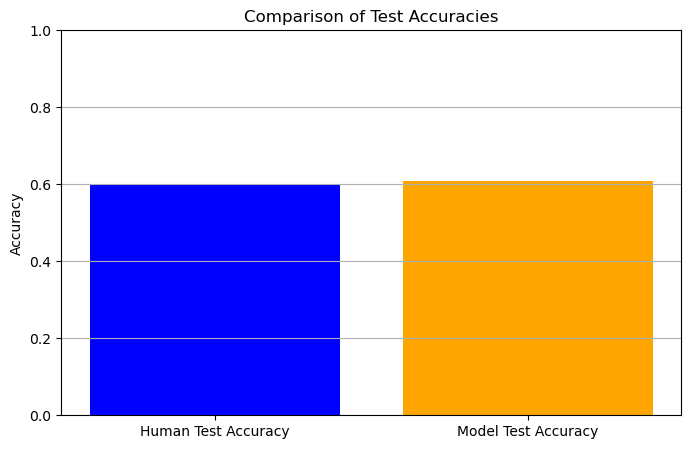

In [82]:
human_test_accuracy = 0.5984 
model_test_accuracy = 0.6087   
labels = ['Human Test Accuracy', 'Model Test Accuracy']
accuracies = [human_test_accuracy, model_test_accuracy]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.ylabel('Accuracy')
plt.title('Comparison of Test Accuracies')
plt.grid(axis='y')
plt.show()

**The model achieved a slightly higher test accuracy (0.6087) than human performance (0.5984).**

In [73]:
# Prepare feature data for modeling
X_full = features.copy()  
y_full = filtered_data[['rocknumber', 'cat_correct']].drop_duplicates(subset='rocknumber').set_index('rocknumber')

X_full_scaled = scaler.fit_transform(X_full.drop(columns=['Token'])) 

In [74]:
best_model.fit(X_full_scaled, y_full['cat_correct'])

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial')),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [75]:
model_probabilities = best_model.predict_proba(X_full_scaled)[:, 1]
print(model_probabilities)

[0.31510638 0.29406444 0.31957868 0.27925795 0.2880809  0.32238894
 0.47323718 0.42583662 0.31271406 0.24219813 0.33246486 0.45179366
 0.31352687 0.49411686 0.29057    0.38223387 0.456444   0.35744646
 0.5894303  0.53817725 0.31408268 0.35687807 0.42421095 0.51016015
 0.40469244 0.39712198 0.40990333 0.33176275 0.42915397 0.30634011
 0.46147247 0.34920191 0.3349791  0.4069304  0.42259768 0.28887954
 0.36965827 0.34135554 0.45498604 0.29333768 0.26123062 0.41758973
 0.42363802 0.51683525 0.33270489 0.29711924 0.48096359 0.33051327
 0.52308202 0.43816311 0.4409449  0.36451208 0.46995336 0.60746453
 0.23635099 0.39773746 0.57626303 0.39351826 0.38087186 0.31546845
 0.34064911 0.42797546 0.32481639 0.33212305 0.25916781 0.36919471
 0.51604367 0.37800655 0.3352581  0.47591056 0.40437114 0.2858946
 0.39092909 0.54324187 0.2860737  0.33325623 0.4624384  0.41758973
 0.44701458 0.50466883 0.31266678 0.41960019 0.53343225 0.51615857
 0.37995766 0.38159285 0.43646693 0.41921846 0.36598136 0.45813

**Question 6 (Part 2) ->**

In [77]:
# Calculate average human accuracy and standard deviation for each rock
avg_human_accuracy = filtered_data.groupby('rocknumber')['cat_correct'].mean()
std_human_accuracy = filtered_data.groupby('rocknumber')['cat_correct'].std()

for rock_num in range(1, 481): 
    avg_accuracy = avg_human_accuracy.get(rock_num, None)
    std_dev = std_human_accuracy.get(rock_num, None)
    print(f"Rock {rock_num}: Average Human Accuracy = {avg_accuracy:.4f}, Standard Deviation = {std_dev:.4f}")

Rock 1: Average Human Accuracy = 0.7470, Standard Deviation = 0.4354
Rock 2: Average Human Accuracy = 0.7195, Standard Deviation = 0.4520
Rock 3: Average Human Accuracy = 0.4512, Standard Deviation = 0.5007
Rock 4: Average Human Accuracy = 0.5000, Standard Deviation = 0.5031
Rock 5: Average Human Accuracy = 0.5122, Standard Deviation = 0.5029
Rock 6: Average Human Accuracy = 0.8519, Standard Deviation = 0.3575
Rock 7: Average Human Accuracy = 0.6707, Standard Deviation = 0.4728
Rock 8: Average Human Accuracy = 0.4024, Standard Deviation = 0.4934
Rock 9: Average Human Accuracy = 0.6799, Standard Deviation = 0.4672
Rock 10: Average Human Accuracy = 0.7195, Standard Deviation = 0.4520
Rock 11: Average Human Accuracy = 0.4573, Standard Deviation = 0.4989
Rock 12: Average Human Accuracy = 0.8018, Standard Deviation = 0.3992
Rock 13: Average Human Accuracy = 0.7195, Standard Deviation = 0.4520
Rock 14: Average Human Accuracy = 0.7492, Standard Deviation = 0.4341
Rock 15: Average Human Accura

In [85]:
results_df = pd.DataFrame({
    'Rock': avg_human_accuracy.index,
    'Average_Human_Accuracy': avg_human_accuracy.values,
    'Model_Probability': model_probabilities
})

In [87]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

print(results_df)

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

     Rock  Average_Human_Accuracy  Model_Probability
0       1                0.746951           0.315106
1       2                0.719512           0.294064
2       3                0.451220           0.319579
3       4                0.500000           0.279258
4       5                0.512195           0.288081
5       6                0.851852           0.322389
6       7                0.670732           0.473237
7       8                0.402439           0.425837
8       9                0.679878           0.312714
9      10                0.719512           0.242198
10     11                0.457317           0.332465
11     12                0.801829           0.451794
12     13                0.719512           0.313527
13     14                0.749235           0.494117
14     15                0.707317           0.290570
15     16                0.777439           0.382234
16     17                0.109756           0.456444
17     18                0.073171           0.

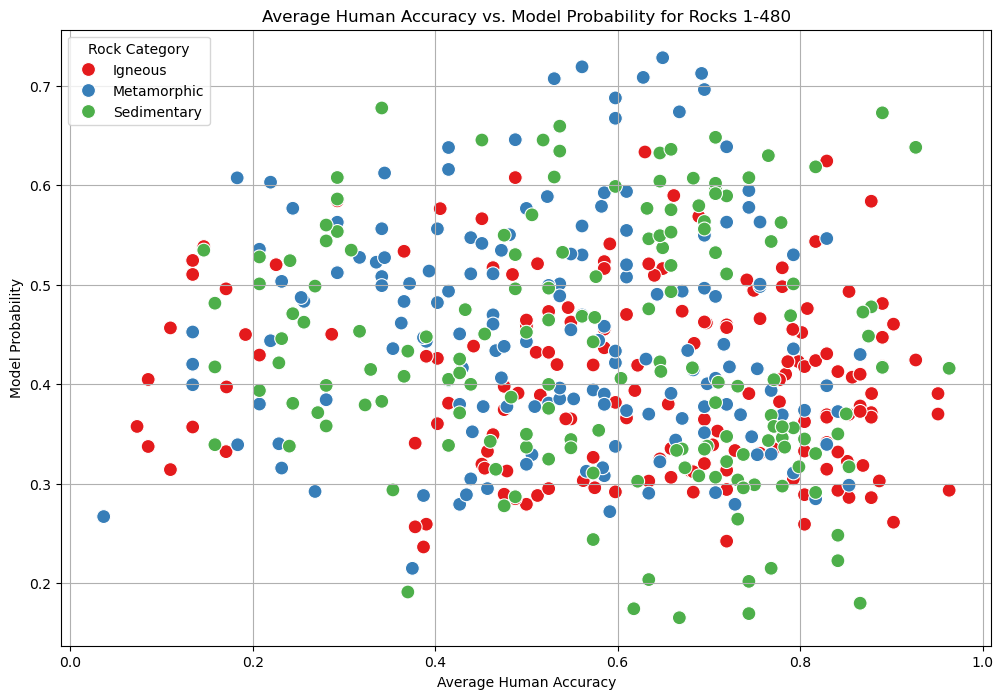

In [89]:
# Scatter plot for average human accuracy vs. model probability
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results_df, x='Average_Human_Accuracy', y='Model_Probability', 
                hue=filtered_data.groupby('rocknumber')['category'].first(), palette='Set1', s=100)
plt.title('Average Human Accuracy vs. Model Probability for Rocks 1-480')
plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.legend(title='Rock Category')
plt.grid()
plt.show()

In [99]:
# Compute average accuracy and probabilities for each rock category
results_df['Category'] = results_df['Rock'].map(category_mapping)

# Calculate correlation and p-value for each category
unique_categories = results_df['Category'].unique()

for category in unique_categories:
    category_data = results_df[results_df['Category'] == category]
    if len(category_data) > 1: 
        correlation, p_value = pearsonr(category_data['Average_Human_Accuracy'], category_data['Model_Probability'])
        print(f'Category: {category}')
        print(f'Correlation Coefficient: {correlation:.4f}')
        print(f'P-value: {p_value:.4f}')
        print(f'Is the correlation significant? {"Yes" if p_value < 0.05 else "No"}\n')

# Compute correlation for all rocks
correlation_all, p_value_all = pearsonr(results_df['Average_Human_Accuracy'], results_df['Model_Probability'])
print(f'Correlation Coefficient (All Rocks): {correlation_all:.4f}')
print(f'P-value (All Rocks): {p_value_all:.4f}')
print(f'Is the correlation significant (All Rocks)? {"Yes" if p_value_all < 0.05 else "No"}')

Category: Igneous
Correlation Coefficient: -0.1175
P-value: 0.1390
Is the correlation significant? No

Category: Metamorphic
Correlation Coefficient: -0.0497
P-value: 0.5323
Is the correlation significant? No

Category: Sedimentary
Correlation Coefficient: -0.1222
P-value: 0.1237
Is the correlation significant? No

Correlation Coefficient (All Rocks): -0.1297
P-value (All Rocks): 0.0044
Is the correlation significant (All Rocks)? Yes


**The analysis shows that for each rock type—Igneous, Metamorphic, and Sedimentary—there's no strong connection between how accurately humans identify the rocks and the model's predictions. However, when looking at all rocks together, there is a small but significant negative relationship. This means that when humans are less accurate, the model's probabilities also tend to be lower.**

**References**

1. https://openai.com/chatgpt/
2. https://www.geeksforgeeks.org/
3. https://stackoverflow.com/